In [4]:
from pathlib import Path
import json

import polars as pl
import numpy as np
from tqdm import tqdm

In [5]:
events_by_id = {}


# just fill events_by_id from parsed data
events_dir = Path('meetup_parser/simple/meetup_parsing/nl--Amsterdam/')
for event_dir in events_dir.iterdir():
    if not event_dir.is_dir():
        continue

    with open(event_dir / 'event') as event_fd:
        event = json.loads(event_fd.read())
        event_attendees = {
            attendee_file.name: json.loads(attendee_file.open().read())
            for attendee_file in (event_dir / 'attendees').iterdir()
        }
        
        events_by_id[event['id']] = {
            'event': event,
            'attendees': event_attendees,
        }

In [3]:
events_by_id['300559210']['event']

{'id': '300559210',
 'event_start_dt': '2024-05-25T18:00:00+02:00',
 'event_end_dt': None,
 'description': "Всем привет!\nДолго собирались и вот таки решили собраться.\nНе ждите ничего кроме расслабленной обстановки, приятных знакомств и интересных историй из жизни и профессии.\nМесто: De Biertuin East\nФормат - едим, пьем, знакомимся, делимся опытом, обсуждаем темы и форматы для следующего митапа\nМы рады всем национальностям и языкам. Главное открытость новому и живой интерес к данным и аналитике.\nНе забывайте добавляться в чат: [https://t.me/databarNL](https://t.me/databarNL)\n\nHello everyone!\nIt took us a while, but we've finally decided to meet up.\nDon’t expect anything but a relaxed atmosphere, pleasant new acquaintances, and interesting stories from life and profession.\nLocation: De Biertuin East\nFormat: we eat, drink, meet, share experiences, discuss topics and formats for the next meetup.\nWe welcome all nationalities and languages. The main thing is openness to new thin

In [4]:
events_by_id['300674357']['event']

{'id': '300674357',
 'event_start_dt': '2024-05-18T14:00:00+02:00',
 'event_end_dt': None,
 'description': 'На нашей следующей встрече в Амстердаме мы обсудим книгу Сергея Гуриева и Даниела Трейсмана **«Диктаторы обмана. Новое лицо тирании в XXI веке»**.\n\nКнига вышла в 2022 году на английском языке в Princeton University Press. Русский перевод вышел в 2023 в фонде Бориса Немцова. Аудиоверсию перевода читает сам Сергей Гуриев.\n\nОсновываясь на статистических данных и разнообразных примерах современных диктатур от России до Сингапура, книга исследует трансформацию недемократических режимов и их лидеров от «диктатур страха», выражающихся в устрашении и открытом подавлении инакомыслия, к «диктатурам обмана», действующим за ширмой свободы слова и номинального соблюдения прав человека.\n\nСергей Гуриев — российский экономист. В 2004-2013 годах был ректором Российской экономической школы. С 2013 года в эмиграции. В 2023 объявлен «иностранным агентом».\n\nАннотация:\n\n*Как устроены недемок

In [5]:
[
    events_by_id['300559210']['attendees']['1994581057'],
    events_by_id['300559210']['attendees']['1994619897'],
]

[{'id': '1994581057',
  'member_id': '197035313',
  'name': 'Ivan Shiryaev',
  'topics': [{'id': '102811', 'name': 'Обработка и анализ данных'},
   {'id': '118597', 'name': 'Электронная коммерция'},
   {'id': '584902', 'name': 'Машинное обучение'},
   {'id': '1056672', 'name': 'Большие данные'},
   {'id': '1139042', 'name': 'Прогнозная аналитика'},
   {'id': '1507160', 'name': 'Технология электронной коммерции'},
   {'id': '1515085', 'name': 'Аналитика данных'}],
  'membership_role': 'MEMBER',
  'membership_status': 'ACTIVE'},
 {'id': '1994619897',
  'member_id': '390864869',
  'name': 'Roman',
  'topics': [{'id': '713', 'name': 'Обеды в ресторанах'},
   {'id': '10447', 'name': 'Творческий круг общения'},
   {'id': '15802', 'name': 'Вино'},
   {'id': '17293', 'name': 'Фитнес'},
   {'id': '17865', 'name': 'Время развлечений'},
   {'id': '18990', 'name': 'Приключение'},
   {'id': '20147', 'name': 'Местные и приезжие в городе'},
   {'id': '21832', 'name': 'Поход по дикой природе'},
   {'i

In [6]:
from collections import Counter
import itertools

attendees_all_topics = [
    attendee['topics']
    for (_, attendee) in events_by_id['300674357']['attendees'].items()
]

attendees_all_tags = Counter(topic['name'] for topic in itertools.chain(*attendees_all_topics))
list(attendees_all_tags.items())[:10]

[('Клуб любителей книг', 4),
 ('Фотография', 2),
 ('Написание книг', 1),
 ('Разработка ПО', 1),
 ('Наука', 1),
 ('Веб-дизайн', 1),
 ('Google', 1),
 ('Музей', 2),
 ('Новая технология', 1),
 ('Облачные вычисления', 1)]

In [7]:
from fastembed import TextEmbedding


# multilingual_large_model = TextEmbedding("intfloat/multilingual-e5-large")
# multilingual_large_model = TextEmbedding("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")
multilingual_large_model = TextEmbedding("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

/home/radmirkus/FILES/study_itmo/diploma/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 8 files: 100%|██████████████████████████████████████| 8/8 [00:00<00:00, 41630.81it/s]


In [23]:
events_descriptions = [event['event']['description'] for event in events_by_id.values()]
print('events_descriptions:', len(events_descriptions))

embeddings_generator = multilingual_large_model.embed(events_descriptions)  # reminder this is a generator
events_descr_embeddings = list(tqdm(embeddings_generator))

events_descriptions: 2025


2025it [08:41,  3.88it/s]


In [27]:
# np.save('minilm_384d_embeddings_amsterdam', events_descr_embeddings)

In [8]:
events_descr_embeddings = np.load('minilm_384d_embeddings_amsterdam.npy')

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0, n_iter = 1000, metric = 'cosine')
embeddings2d = tsne.fit_transform(np.array(events_descr_embeddings))

In [12]:
embeddingsdf = pl.DataFrame(
    {
        'x': embeddings2d[:,0],
        'y': embeddings2d[:,1],
    }
)
embeddingsdf

x,y
f32,f32
12.833511,-21.938253
1.245057,-15.644027
-9.112254,0.296646
-8.351098,5.585765
13.175009,26.454639
…,…
-21.80901,0.889711
-1.079856,-14.455812
8.595817,2.274178


In [10]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit(np.array(events_descr_embeddings))

PCA(n_components=3)

In [12]:
df = pl.DataFrame([event['event'] for event in events_by_id.values()])
df.drop('high_res_photo_url', 'event_end_dt')

id,event_start_dt,description,event_type,event_url,is_online,group,rsvp_total_count,title,venue,social_labels
str,str,str,str,str,bool,struct[7],i64,str,struct[7],list[null]
"""298415155""","""2024-05-17T20:…","""Ha mannen! Zo…","""PHYSICAL""","""https://www.me…",false,"{""25163890"",false,false,""https://secure.meetupstatic.com/photos/event/a/d/a/f/highres_473864463.jpeg"",""ManKracht"",""Europe/Amsterdam"",""mankracht""}",5,"""ManKracht Offl…","{""27793215"",""Bas' nieuwe huis"",52.204655,5.410423,null,""Amersfoort"",""NL""}",[]
"""300475806""","""2024-04-30T19:…","""In dit socrati…","""PHYSICAL""","""https://www.me…",false,"{""26568354"",false,false,""https://secure.meetupstatic.com/photos/event/a/7/9/9/highres_503262905.jpeg"",""Filosofie Meetup Leeuwarden"",""Europe/Amsterdam"",""filosofie-meetup-leeuwarden""}",15,"""Lastige vrage…","{""26998431"",""dbieb Leeuwarden"",53.200157,5.800128,null,""Leeuwarden"",""nl""}",[]
"""297437934""","""2024-05-05T14:…","""Hello! This is…","""PHYSICAL""","""https://www.me…",false,"{""18591715"",false,false,""https://secure.meetupstatic.com/photos/event/e/1/b/f/highres_508077791.jpeg"",""Brussels Tennis Meetup"",""Europe/Brussels"",""brussels-tennis-meetup""}",16,"""Tennis doubles…","{""27563479"",""Pl. Terdelt 1"",50.867462,4.390431,null,""Schaerbeek"",""be""}",[]
"""300286368""","""2024-06-21T12:…","""**Where:** Our…","""PHYSICAL""","""https://www.me…",false,"{""31725795"",false,false,""https://secure.meetupstatic.com/photos/event/d/8/0/0/highres_484975296.jpeg"",""Walking in Brussels"",""Europe/Brussels"",""shortwalk""}",20,"""Annual Summer …","{""27788448"",""Kon. Emmaweg 4"",51.579502,3.605571,null,""Vrouwenpolder"",""nl""}",[]
"""300698921""","""2024-05-01T18:…","""We start off w…","""PHYSICAL""","""https://www.me…",false,"{""36263863"",false,false,""https://secure.meetupstatic.com/photos/event/a/e/d/3/highres_503324755.jpeg"",""Spong Atelier Figure Drawing"",""Europe/Amsterdam"",""spong-atelier-figure-drawing-classes""}",2,"""Figure Drawing…","{""27303533"",""Spong Atelier"",52.381447,4.89041,null,""Amsterdam"",""nl""}",[]
…,…,…,…,…,…,…,…,…,…,…
"""300066345""","""2024-05-27T18:…","""Hi there, fell…","""PHYSICAL""","""https://www.me…",false,"{""36008813"",false,false,""https://secure.meetupstatic.com/photos/event/7/c/1/7/highres_500371767.jpeg"",""Amsterdam Social Media Creators and Influencer Meetups"",""Europe/Amsterdam"",""social-rising-amsterdam""}",4,"""Social Media C…","{""26256228"",""Tolbar"",52.35273,4.906676,null,""Amsterdam"",""nl""}",[]
"""300010690""","""2024-05-04T10:…","""**Bonjour et b…","""ONLINE""","""https://www.me…",true,"{""32916057"",false,false,""https://secure.meetupstatic.com/photos/event/a/e/9/3/highres_509624691.jpeg"",""Osons parler argent"",""Europe/Paris"",""Cafe-Philo-sur-lArgent""}",2,"""Atelier budget…","{""26906060"",""Online event"",49.86689,8.62761,null,"""",""""}",[]
"""300436247""","""2024-05-21T18:…","""Our next meetu…","""PHYSICAL""","""https://www.me…",false,"{""36090802"",false,false,""https://secure.meetupstatic.com/photos/event/7/e/9/3/highres_501332403.jpeg"",""BrabanDerS"",""Europe/Amsterdam"",""brabanders""}",10,"""BrabanDerS @ C…","{""27793427"",""CM.com"",51.602886,4.770968,null,""Breda"",""nl""}",[]


In [13]:
df = pl.DataFrame([event['event'] for event in events_by_id.values()])
df = df.drop('event_url', 'high_res_photo_url', 'group', 'venue', 'event_end_dt')
df = df.with_columns(pl.Series(name="embeddings", values=events_descr_embeddings))
df

id,event_start_dt,description,event_type,is_online,rsvp_total_count,title,social_labels,embeddings
str,str,str,str,bool,i64,str,list[null],list[f32]
"""298415155""","""2024-05-17T20:…","""Ha mannen! Zo…","""PHYSICAL""",false,5,"""ManKracht Offl…",[],"[0.086312, -0.033373, … -0.014815]"
"""300475806""","""2024-04-30T19:…","""In dit socrati…","""PHYSICAL""",false,15,"""Lastige vrage…",[],"[0.102069, 0.004617, … 0.012265]"
"""297437934""","""2024-05-05T14:…","""Hello! This is…","""PHYSICAL""",false,16,"""Tennis doubles…",[],"[0.092258, -0.067128, … 0.029374]"
"""300286368""","""2024-06-21T12:…","""**Where:** Our…","""PHYSICAL""",false,20,"""Annual Summer …",[],"[0.112958, -0.040467, … 0.042494]"
"""300698921""","""2024-05-01T18:…","""We start off w…","""PHYSICAL""",false,2,"""Figure Drawing…",[],"[0.053261, 0.002334, … -0.007331]"
…,…,…,…,…,…,…,…,…
"""300066345""","""2024-05-27T18:…","""Hi there, fell…","""PHYSICAL""",false,4,"""Social Media C…",[],"[0.092528, -0.063742, … 0.018945]"
"""300010690""","""2024-05-04T10:…","""**Bonjour et b…","""ONLINE""",true,2,"""Atelier budget…",[],"[0.053392, -0.032121, … 0.006377]"
"""300436247""","""2024-05-21T18:…","""Our next meetu…","""PHYSICAL""",false,10,"""BrabanDerS @ C…",[],"[0.040066, -0.053181, … 0.026604]"


In [14]:
pca.transform(np.array([np.array(list(df['embeddings']))[0]]))

array([[ 0.18604863, -0.3664271 , -0.0592917 ]], dtype=float32)

In [15]:
pca_coords = pca.transform(np.array(list(df['embeddings'])))
pca_coords

array([[ 0.18604863, -0.3664271 , -0.0592917 ],
       [-0.11043364, -0.2099844 , -0.04997737],
       [-0.2860898 ,  0.02729372, -0.1079313 ],
       ...,
       [ 0.07739816,  0.12583059, -0.16427746],
       [-0.34108636,  0.05151492, -0.02609877],
       [ 0.2637892 , -0.23960552,  0.06661018]], dtype=float32)

In [16]:
df = pl.concat([df, pl.DataFrame(pca_coords)], how='horizontal')
df

id,event_start_dt,description,event_type,is_online,rsvp_total_count,title,social_labels,embeddings,column_0,column_1,column_2
str,str,str,str,bool,i64,str,list[null],list[f32],f32,f32,f32
"""298415155""","""2024-05-17T20:…","""Ha mannen! Zo…","""PHYSICAL""",false,5,"""ManKracht Offl…",[],"[0.086312, -0.033373, … -0.014815]",0.186049,-0.366427,-0.059292
"""300475806""","""2024-04-30T19:…","""In dit socrati…","""PHYSICAL""",false,15,"""Lastige vrage…",[],"[0.102069, 0.004617, … 0.012265]",-0.110434,-0.209984,-0.049977
"""297437934""","""2024-05-05T14:…","""Hello! This is…","""PHYSICAL""",false,16,"""Tennis doubles…",[],"[0.092258, -0.067128, … 0.029374]",-0.28609,0.027294,-0.107931
"""300286368""","""2024-06-21T12:…","""**Where:** Our…","""PHYSICAL""",false,20,"""Annual Summer …",[],"[0.112958, -0.040467, … 0.042494]",-0.227674,-0.025775,-0.029787
"""300698921""","""2024-05-01T18:…","""We start off w…","""PHYSICAL""",false,2,"""Figure Drawing…",[],"[0.053261, 0.002334, … -0.007331]",0.287139,0.191658,0.159099
…,…,…,…,…,…,…,…,…,…,…,…
"""300066345""","""2024-05-27T18:…","""Hi there, fell…","""PHYSICAL""",false,4,"""Social Media C…",[],"[0.092528, -0.063742, … 0.018945]",-0.341219,0.086971,-0.082173
"""300010690""","""2024-05-04T10:…","""**Bonjour et b…","""ONLINE""",true,2,"""Atelier budget…",[],"[0.053392, -0.032121, … 0.006377]",-0.187837,-0.265957,-0.135438
"""300436247""","""2024-05-21T18:…","""Our next meetu…","""PHYSICAL""",false,10,"""BrabanDerS @ C…",[],"[0.040066, -0.053181, … 0.026604]",0.077398,0.125831,-0.164277


In [40]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import HDBSCAN

# clustering = DBSCAN(min_samples=2).fit(events_descr_embeddings)
# clustering = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(events_descr_embeddings)
hdb = HDBSCAN(min_cluster_size=20).fit(events_descr_embeddings)

# values = clustering.labels_
# values = X_embedded
df = df.with_columns(pl.Series(name="cluster", values=clustering.labels_))

In [ ]:
from sklearn.manifold import TSNE


tsne_coords = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(events_descr_embeddings)

In [21]:
df

id,event_start_dt,description,event_type,is_online,rsvp_total_count,title,social_labels,embeddings,column_0,column_1,column_2,cluster
str,str,str,str,bool,i64,str,list[null],list[f32],f32,f32,f32,i64
"""298415155""","""2024-05-17T20:…","""Ha mannen! Zo…","""PHYSICAL""",false,5,"""ManKracht Offl…",[],"[0.086312, -0.033373, … -0.014815]",0.186049,-0.366427,-0.059292,-1
"""300475806""","""2024-04-30T19:…","""In dit socrati…","""PHYSICAL""",false,15,"""Lastige vrage…",[],"[0.102069, 0.004617, … 0.012265]",-0.110434,-0.209984,-0.049977,-1
"""297437934""","""2024-05-05T14:…","""Hello! This is…","""PHYSICAL""",false,16,"""Tennis doubles…",[],"[0.092258, -0.067128, … 0.029374]",-0.28609,0.027294,-0.107931,-1
"""300286368""","""2024-06-21T12:…","""**Where:** Our…","""PHYSICAL""",false,20,"""Annual Summer …",[],"[0.112958, -0.040467, … 0.042494]",-0.227674,-0.025775,-0.029787,-1
"""300698921""","""2024-05-01T18:…","""We start off w…","""PHYSICAL""",false,2,"""Figure Drawing…",[],"[0.053261, 0.002334, … -0.007331]",0.287139,0.191658,0.159099,-1
…,…,…,…,…,…,…,…,…,…,…,…,…
"""300066345""","""2024-05-27T18:…","""Hi there, fell…","""PHYSICAL""",false,4,"""Social Media C…",[],"[0.092528, -0.063742, … 0.018945]",-0.341219,0.086971,-0.082173,172
"""300010690""","""2024-05-04T10:…","""**Bonjour et b…","""ONLINE""",true,2,"""Atelier budget…",[],"[0.053392, -0.032121, … 0.006377]",-0.187837,-0.265957,-0.135438,-1
"""300436247""","""2024-05-21T18:…","""Our next meetu…","""PHYSICAL""",false,10,"""BrabanDerS @ C…",[],"[0.040066, -0.053181, … 0.026604]",0.077398,0.125831,-0.164277,181


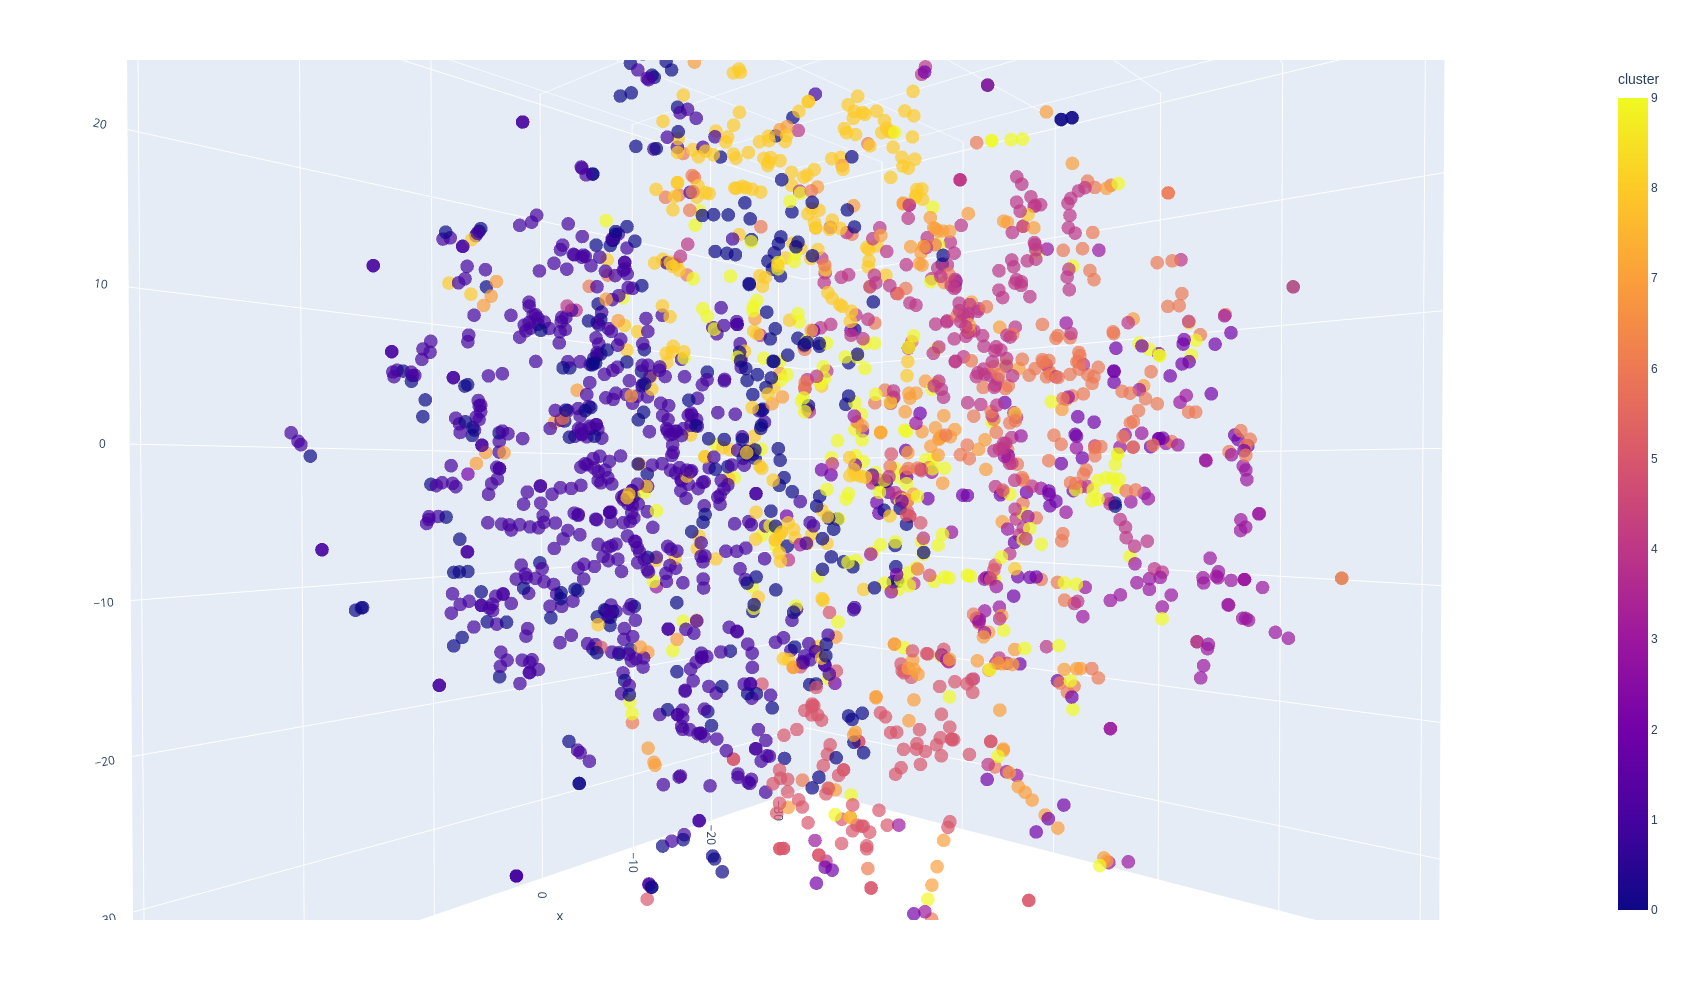

In [41]:
import plotly.express as px
fig = px.scatter_3d(
    # df, x='column_0', y='column_1', z='column_2',
    df, x=tsne_coords[0:,0], y=tsne_coords[0:,1], z=tsne_coords[0:,2],
    opacity=0.7, size_max=15, color='cluster', hover_data='title',
    width=1000, height=1000,
)
fig.show()